In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/creditcard.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.info())
print(data.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print("Class Distribution:")
print(data['Class'].value_counts())


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Create a feature for transaction hour
data['Hour'] = (data['Time'] // 3600) % 24

# Scale the 'Amount' for better model learning
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data[['Amount']])

# Drop original 'Time' and 'Amount' for now
data = data.drop(['Time', 'Amount'], axis=1)

print(data.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Hour  Scaled_Amount  
0 -0.1

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original Dataset Class Distribution:", y_train.value_counts())
print("Resampled Dataset Class Distribution:", y_train_resampled.value_counts())


Original Dataset Class Distribution: Class
0    199020
1       344
Name: count, dtype: int64
Resampled Dataset Class Distribution: Class
0    199020
1    199020
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

print("Model training completed successfully! ")


Model training completed successfully! 🌟


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = model.predict(X_test)

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[85279    16]
 [   34   114]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



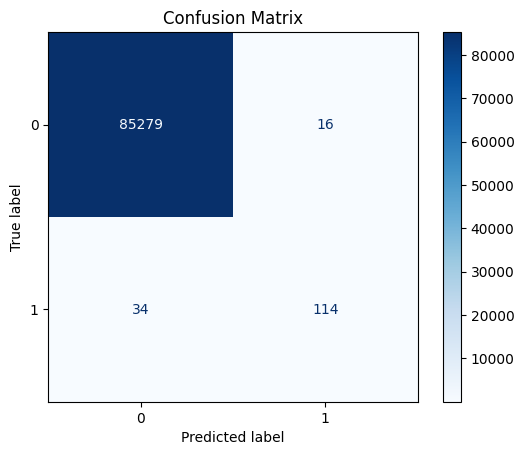

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
